## Read the Input
Given a set of 2D points in a file (one point per line represented by its float coordination X and Y with one space
between). The first step is to pars the file correctly.

In [3]:
points_file = open("points_with_outline.txt", "r")
list_x_y = points_file.read().splitlines()
points_list = []
for x_y in list_x_y:
    point = tuple(x_y.split(' '))
    point = (float(point[0]), float(point[1]))
    points_list.append(point)
print ("data loaded")
# points_list

data loaded


## Draw points
For better understanding of the position of points visually, we can draw it as a scatter type in matplotlib.

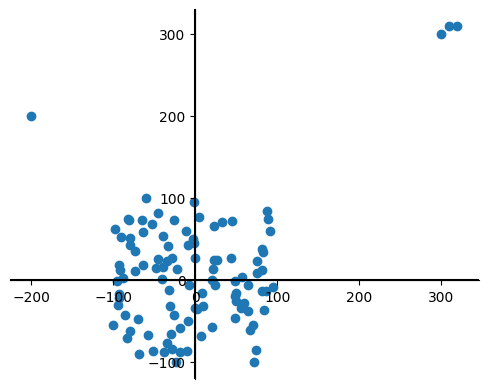

In [4]:
import matplotlib.pyplot as plt
x = [point[0] for point in points_list]
y = [point[1] for point in points_list]
plt.scatter(x, y)
# use set_position
ax = plt.gca()
ax.spines['top'].set_color('none')
ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.set_aspect( 1 )



plt.axhline(0, color='black')
plt.axvline(0, color='black')
plt.show() 


## Problem 1: Minimum sum of Euclidean distance
It is desired to find a point on X axis (Y=0) with minimum sum of Euclidean distance to all the given points.
It can be consider as cost function or objective function to optimize:
$$
  \sum_{i=1}^{n}\sqrt[]{(x-x_i)^{2} +y_i^{2}}
$$
It can be prove that the derivation of this cost function is (it is impelemented in cost_derivation function):
$$
  \sum_{i=1}^{n}\frac{x-x_i}{\sqrt[]{(x-x_i)^{2} + y_i^{2}}}
$$

In [5]:
import math


# this function takes the points and current x, calculate the derivation of cost function with current x
def cost_derivation(points_list, x):
    sum = 0
    for point in points_list:
        sum += (x-point[0]) / (((x-point[0])**2 + point[1]**2)**0.5)
    return sum
        
learning_variable = min(x) # first x consider to be minimum of them 
prev_variable = math.inf # first 
alpha = 0.01 #learning rate
while abs(prev_variable - learning_variable) >= 0.0000001:
    prev_variable = learning_variable
    learning_variable = learning_variable - alpha * cost_derivation(points_list, learning_variable)
#     print(learning_variable) # you can uncommnet to see the gradient decent iterations
print ("The optimal point on X axis is:", learning_variable)

The optimal point on X axis is: -6.421224720146806


## Problem2: Find Circle With Minimum Radius
It is desired to find a point on X axis (Y=0) as the center of a circle with minimum radius including all the points.Minimum radius in our problem is the maximum distance from the farest point. It can be obtained from function itself and then caclulation of derivation on this maximum point.

In [8]:
import math


# this function takes the points and current x, calculate the derivation of cost function with current x
def max_derivation(points_list, x):
    max_function_value = -1*math.inf
    max_point = (0, 0)
    for point in points_list:
        function_value = ((x-point[0])**2 + point[1]**2) ** 0.5
        if max_function_value < function_value:
            max_function_value = function_value
            max_point = point
    return (x-max_point[0]) / (((x-max_point[0])**2 + max_point[1]**2)**0.5)
        
learning_variable = min(x) # first x consider to be minimum of them 
prev_variable = math.inf # first 
alpha = 0.1 #learning rate
iteration = 0
while abs(prev_variable - learning_variable) >= 0.001 and iteration<10000:
    prev_variable = learning_variable
    iteration += 1
    learning_variable = learning_variable - alpha * max_derivation(points_list, learning_variable)
#     print(learning_variable) # you can uncommnet to see the gradient decent iterations
print ("The optimal point on X axis is:", learning_variable)
max_distance = 0
optimal = learning_variable
for point in points_list:
    cost = ((optimal-point[0])**2 + point[1]**2)**0.5 #calculate the ecludian distanse
    if cost>max_distance:
        max_distance = cost
min_radius = round(max_distance, 4)
print ("The Minimum Radius is:", min_radius)


The optimal point on X axis is: 113.94090599162591
The Minimum Radius is: 372.237


## Draw the Circle
It is shown in the figure that the circle is 

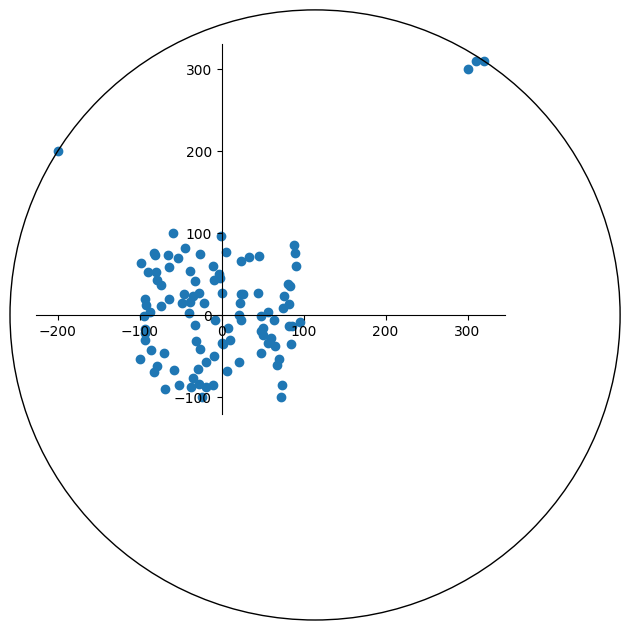

In [9]:
import matplotlib.pyplot as plt
x = [point[0] for point in points_list]
y = [point[1] for point in points_list]
plt.scatter(x, y)

# use set_position
ax = plt.gca()
ax.spines['top'].set_color('none')
ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.set_aspect( 1 )
# plt.xticks(range(-int(max_radius)-10,int(max_radius)+11,5))
# plt.yticks(range(-int(max_radius)-10,int(max_radius)+11,5))
circle1 = plt.Circle((learning_variable,0),min_radius, color = 'k', fill = False, clip_on = False)
ax.add_artist(circle1)

plt.show()

## Building Random Points

In [10]:
import random

#parameters
number_of_points = 100
range_of_x = (-100, 100) 
range_of_y = (-100, 100)
points_file = open("points.txt", "w")
for i in range(number_of_points):
    x = random.randint(range_of_x[0], range_of_x[1])
    y = random.randint(range_of_y[0], range_of_y[1])
    
    points_file.write(f"{x} {y}\n")
points_file.close()
